#Analisando Dados dos servidores da UFMA
### Qual é a quantidade de docentes e técnicos administrativos por unidade, sexo e titulação?


In [ ]:
import pandas as pd
url_2020 = "http://dadosabertos.ufma.br/dataset/334d89c8-629f-49c5-aa06-171e35c1d33b/resource/55a2d103-d73b-449e-85bc-655df7dfc45a/download/docentes_-_2020.csv"

colunas = ['nome','unidade','sexo','titulacao']
df = pd.read_csv(url_2020, sep = ";", usecols=colunas)
# ou podemos usar o método DROP :
# df = pd.drop("Unnamed : 4", axis = 1, inplace = True )
#df.head()
#df.info()

df.unidade.value_counts().sort_values(ascending = False).head(10)
#df.unidade.value_counts(): conta o número de vezes que um determinado valor aparece na coluna selecionada (no caso 'unidade')
#.sort_valeus(ascending = False): ordena os valores de forma descrescente(do maior para o menor)
#.head(10): mostra os 10 primeiros valores


,count
unidade,
COLEGIO UNIVERSITARIO,81
COORDENACAO DO CURSO DE MEDICINA IMPERATRIZ/CCSST,60
COORDENACAO DO CURSO DE MEDICINA PINHEIRO/CCHNST,57
DEPARTAMENTO DE LETRAS/CCH,47
DEPARTAMENTO DE MEDICINA I/CCBS,45
DEPARTAMENTO DE DIREITO/CCSO,44
COORDENACAO DO CURSO DE CIENCIA E TECNOLOGIA/CCET,41
DEPARTAMENTO DE EDUCACAO II/CCSO,40
DEPARTAMENTO DE COMUNICACAO SOCIAL/CCSO,40


<Axes: xlabel='titulacao'>

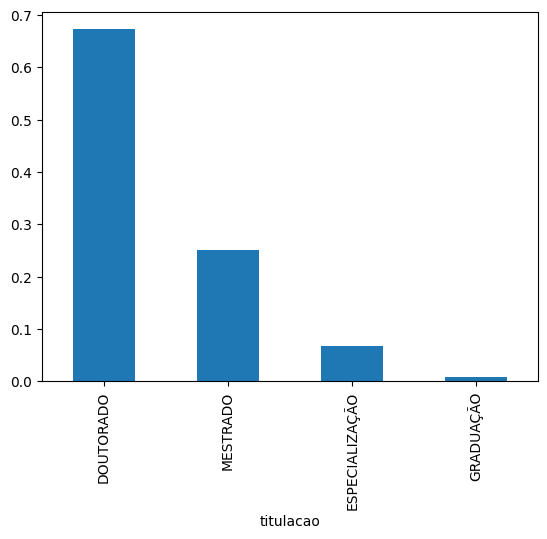

In [ ]:
#df['titulacao'].value_counts(normalize = True).plot(kind='bar')
#df['titulacao']: seleciona a coluna 'titulacao' no dataframe.
#.value_counts: retorna o número de vezes em que cada valor aparece na coluna
#(normalize = True): é um argumento para a função valor_counts(), que retorna a proporção de cada valor.
#.plot(kind='bar'): utiliza a biblioteca Matplotlib para criar um gráfico em forma de barra
df.loc[245].titulacao = 'DOUTORADO'
#Foi encontrado um erro dentro do df (Pós-doutorado), esse erro foi corrigido com a linha de código acima pois o DF
#estudado só traz dados de titularidade até DOUTORADO
df['titulacao'].value_counts(normalize = True).plot(kind='bar')

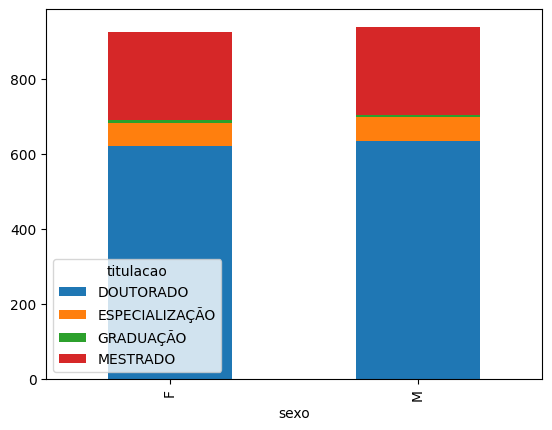

In [ ]:
df.value_counts(['sexo','titulacao']).unstack().plot(kind='bar',stacked=True)
#df.value_counts(['sexo', 'titulacao']): utilizando esse método para contar a
#frequência que cada valor aparece nas colunas indicadas no parâmetro(sexo e titulação)
#.unstack().plot(kind='bar',stacked=True): Utilizado para plotar o gráfico de barras empilhadas

In [ ]:
docentes_masculino = df.query("sexo == 'M'").unidade.value_counts()
docentes_feminino = df.query("sexo == 'F'").unidade.value_counts()

docentes_masculino.sort_values(ascending=False).head(10)



,count
unidade,
COLEGIO UNIVERSITARIO,37
COORDENACAO DO CURSO DE CIENCIA E TECNOLOGIA/CCET,29
DEPARTAMENTO DE ENGENHARIA ELETRICA/CCET,28
COORDENACAO DO CURSO DE MEDICINA PINHEIRO/CCHNST,27
DEPARTAMENTO DE MATEMATICA/CCET,27
DEPARTAMENTO DE DIREITO/CCSO,27
DEPARTAMENTO DE MEDICINA I/CCBS,23
DEPARTAMENTO DE FILOSOFIA/CCH,22
COORDENACAO DO CURSO DE MEDICINA IMPERATRIZ/CCSST,21


In [ ]:
docentes_feminino.sort_values(ascending=False).head(10)

,count
unidade,
COLEGIO UNIVERSITARIO,44
COORDENACAO DO CURSO DE MEDICINA IMPERATRIZ/CCSST,39
DEPARTAMENTO DE LETRAS/CCH,37
DEPARTAMENTO DE EDUCACAO II/CCSO,32
COORDENACAO DO CURSO DE MEDICINA PINHEIRO/CCHNST,30
DEPARTAMENTO DE ENFERMAGEM/CCBS,30
DEPARTAMENTO DE CIENCIAS FISIOLOGICAS/CCBS,29
DEPARTAMENTO DE EDUCACAO I/CCSO,28
COORDENACAO DO CURSO DE ENFERMAGEM/CCSST,26
